In [ ]:
import cv2
import tensorflow.keras as keras
import tensorflow as tf
import math
import numpy as np
import os
import cv2
from google.colab.patches import cv2_imshow
import random
 
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd  
 
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation, DBSCAN, KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot

In [ ]:
len_single = 5
len_pair = 10

In [ ]:
## belief vectors
BV1 = tf.Variable(np.random.randn(1, len_single), trainable = True)
BV2 = tf.Variable(np.random.randn(1, len_single), trainable = True)
BV3 = tf.Variable(np.random.randn(1, len_single), trainable = True)
BV4 = tf.Variable(np.random.randn(1, len_single), trainable = True)
BV12 = tf.Variable(np.random.randn(1,len_pair),trainable = True)
BV13 = tf.Variable(np.random.randn(1,len_pair ), trainable = True)
BV14 = tf.Variable(np.random.randn(1,len_pair), trainable = True)
BV23 = tf.Variable(np.random.randn(1,len_pair ), trainable = True)
BV24 = tf.Variable(np.random.randn(1,len_pair), trainable = True)
BV34 = tf.Variable(np.random.randn(1,len_pair ), trainable = True)

In [ ]:
marker = '1_3'

In [ ]:
#loading
np_var =  np.load('/content/drive/My Drive/VIPUL COLAB AND DATA/IVs' + marker + '.npy')

  
 
BV12 = tf.Variable(np_var[:,6:16])
BV13 = tf.Variable(np_var[:,16:26])
 
BV14 = tf.Variable(np_var[:,26:36])
BV23 = tf.Variable(np_var[:,36:46])
 
 
BV24 = tf.Variable(np_var[:,46:56])
BV34 = tf.Variable(np_var[:,56:66])

In [ ]:
lst_IVs = [BV12, BV13, BV14, BV23, BV24, BV34]

Data Generator

In [ ]:
 
#input
folder = '1-d_colliding'
#/content/drive/My Drive/VIPUL COLAB AND DATA/vipul_data
#path = '/content/drive/My Drive/VIPUL COLAB AND DATA/'
arr = np.load('/content/drive/My Drive/VIPUL COLAB AND DATA/collision_and_pass_data/' + folder +'/3.npy')
pos_arr = arr[3:, 0:4]
vel_arr = arr[3:, 4:8]
 
 
  
pos__1 = pos_arr[:,0]
pos__2 = pos_arr[:,1]
pos__3 = pos_arr[:,2]
pos__4 = pos_arr[:,3]
 
vel__1 = vel_arr[:,0]
vel__2 = vel_arr[:,1]
vel__3 = vel_arr[:,2]
vel__4 = vel_arr[:,3]
 
print( pos__1.shape,   pos_arr.shape,  vel__1.shape)
print(arr[3:])

NameError: ignored

Pick the moments of interaction (close approach)

In [ ]:
lst = [[], [], [], [], [], []]
pairs = [(1,2), (1,3), (1,4), (2,3), (2,4), (3,4)]
r = 0.9
dist_for_min = 0.3 + 2*r
dist = 3
n = 6
for i in range(n):
  start = -1
  end = 1
  interval = [0,0]
  j = 0
  min_dist = 30
  while(j < pos__1.shape[0]):
    if(start == -1 and abs(pos_arr[j,pairs[i][0]-1]-pos_arr[j, pairs[i][1]-1]) < dist):
      print(i,j,  "start started")
      interval[0] = j
      start = 1
      end = -1
      min_dist = 30
    elif (start == 1 and end == -1):
      if(abs(pos_arr[j,pairs[i][0]-1]-pos_arr[j, pairs[i][1]-1]) > dist):
        if(min_dist < dist_for_min):
          print(i, j, "exited from start, and saved")
          #save and set start = -1, end = 1
          interval[1] = j;
          lst[i].append(interval)
          interval = [0,0]
          start = -1
          end = 1
        else:
          #dont save and set start to -1, end = 1
          print(i, j, "exited from start, not saved")
          start = -1
          end = 1
          interval = [0,0]
      else:
        min_dist = min(min_dist, abs(pos_arr[j,pairs[i][0]-1]-pos_arr[j, pairs[i][1]-1]))
    j += 1


print(lst)


0 129 start started
0 169 exited from start, and saved
0 549 start started
0 589 exited from start, and saved
0 850 start started
0 886 exited from start, and saved
0 1124 start started
0 1164 exited from start, and saved
0 1544 start started
0 1584 exited from start, and saved
0 1746 start started
0 1785 exited from start, and saved
1 170 start started
1 260 exited from start, and saved
1 403 start started
1 439 exited from start, and saved
1 892 start started
1 964 exited from start, and saved
1 1046 start started
1 1086 exited from start, and saved
1 1621 start started
1 1661 exited from start, and saved
1 1691 start started
1 1763 exited from start, and saved
2 0 start started
2 4 exited from start, not saved
2 52 start started
2 92 exited from start, and saved
2 626 start started
2 666 exited from start, and saved
2 731 start started
2 803 exited from start, and saved
2 1298 start started
2 1334 exited from start, and saved
2 1370 start started
2 1460 exited from start, and saved


In [ ]:
for i in range(6):
  for j in range(len(lst[i])):
    print("/////////////////////////////////////////////////",i , "///////////////////////", j )
    start = lst[i][j][0]
    end = lst[i][j][1]
    for k in range(start, end):
      print(pos_arr[k,pairs[i][0]-1]-pos_arr[k, pairs[i][1]-1])
    

///////////////////////////////////////////////// 0 /////////////////////// 0
-2.9102840423583984
-2.760284423828125
-2.6102848052978516
-2.460285186767578
-2.3102855682373047
-2.1602859497070312
-2.010286331176758
-1.8602867126464844
-1.710287094116211
-1.5602874755859375
-1.410287857055664
-1.2602882385253906
-1.1102886199951172
-0.9602890014648438
-0.8102893829345703
-0.6602897644042969
-0.5102901458740234
-0.36029052734375
-0.21029090881347656
-0.060291290283203125
0.08970832824707031
0.23970794677734375
0.3897075653076172
0.5397071838378906
0.6897068023681641
0.8397064208984375
0.9897060394287109
1.1397066116333008
1.2897071838378906
1.4397077560424805
1.5897083282470703
1.7397089004516602
1.88970947265625
2.03971004486084
2.1897106170654297
2.3397111892700195
2.4897117614746094
2.639712333679199
2.789712905883789
2.939713478088379
///////////////////////////////////////////////// 0 /////////////////////// 1
2.908435821533203
2.7584362030029297
2.6084365844726562
2.458436965942383

In [ ]:
#bads = [[4,0]]
lst[4].pop(0)

[0, 14]

The *model* objective -> achieve a describing vector of interaction seen in the time series of positions and velocity. 

1> Compare the two time series (absolute distances), and group the similar ones.

2> Predict distance, rel vel magntude
,

3> 

> Indented block



In [ ]:
#pos1_t0,pos2_t0, vel1_t0, vel2_t0
def PP():
  inp1 = keras.layers.Input(shape = (len_pair, ))
  inp2 = keras.layers.Input(shape = (2, ))
  concat = keras.layers.Concatenate(axis = -1)([inp1, inp2])
  out = keras.layers.Dense(25, activation = 'sigmoid')(concat)
  out = keras.layers.Dense(50, activation = 'sigmoid')(out)
  
  abs_rel_pos = keras.layers.Dense(25, activation = 'sigmoid')(out)
  abs_rel_pos = keras.layers.Dense(12, activation = 'sigmoid')(abs_rel_pos)
  abs_rel_pos = keras.layers.Dense(12, activation = 'sigmoid')(abs_rel_pos)
  abs_rel_pos = keras.layers.Dense(6, activation = 'sigmoid')(abs_rel_pos)
  abs_rel_pos = keras.layers.Dense(1)(abs_rel_pos)
  

  abs_rel_vel = keras.layers.Dense(25, activation = 'sigmoid')(out)
  abs_rel_vel = keras.layers.Dense(12, activation = 'sigmoid')(abs_rel_vel)
  abs_rel_vel = keras.layers.Dense(12, activation = 'sigmoid')(abs_rel_vel)
  abs_rel_vel = keras.layers.Dense(6, activation = 'sigmoid')(abs_rel_vel)
  abs_rel_vel = keras.layers.Dense(1)(abs_rel_vel)

  '''post1 = keras.layers.Dense(25, activation = 'sigmoid')(out)
  post1 = keras.layers.Dense(12, activation = 'sigmoid')(post1)
  post1 = keras.layers.Dense(6, activation = 'sigmoid')(post1)
  post1 = keras.layers.Dense(1)(post1)
 
 
  post2 = keras.layers.Dense(25, activation = 'sigmoid')(out)
  post2 = keras.layers.Dense(12, activation = 'sigmoid')(post2)
  post2 = keras.layers.Dense(6, activation = 'sigmoid')(post2)
  post2 = keras.layers.Dense(1)(post2)
 

  vel2 = keras.layers.Dense(25, activation = 'sigmoid')(out)
  vel2 = keras.layers.Dense(12, activation = 'sigmoid')(vel2)
  vel2 = keras.layers.Dense(6, activation = 'sigmoid')(vel2)
  vel2 = keras.layers.Dense(1)(vel2)

  vel1 = keras.layers.Dense(25, activation = 'sigmoid')(out)
  vel1 = keras.layers.Dense(12, activation = 'sigmoid')(vel1)
  vel1 = keras.layers.Dense(6, activation = 'sigmoid')(vel1)
  vel1 = keras.layers.Dense(1)(vel1)'''
  
  output = keras.layers.Concatenate(axis = 1)([abs_rel_pos, abs_rel_vel])
  model = keras.Model([inp1, inp2], output)
  return model

In [ ]:
pair_pred = PP()
pair_pred.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 10)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 12)           0           input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 25)           325         concatenate[0][0]            

In [ ]:
def loss_fn(output, next_output):
  loss_mag = tf.reduce_mean(tf.losses.mean_squared_error(output, next_output))
  return loss_mag

In [ ]:
pair_pred = keras.models.load_model('/content/drive/My Drive/VIPUL COLAB AND DATA/m' + marker + '.hdf5')

In [ ]:
lst_IVs = [BV12, BV13, BV14, BV23, BV24, BV34]

In [ ]:
def window_generator(start , finish, pair):
    inp_pos_first = pos_arr[start:finish, pair[0]-1:pair[0]]
    inp_pos_second = pos_arr[start:finish, pair[1]-1:pair[1]]
    abs_rel_pos = np.absolute(np.subtract(inp_pos_first  ,inp_pos_second))
    inp_vel_first = vel_arr[start:finish, pair[0]-1:pair[0]]
    inp_vel_second = vel_arr[start:finish, pair[1]-1:pair[1]]
    abs_rel_vel = np.absolute(np.subtract(inp_vel_first  ,inp_vel_second))
    inp = np.concatenate((abs_rel_pos, abs_rel_vel), axis = 1)
    return inp

In [ ]:
 
optimizer = keras.optimizers.Adam(learning_rate = 0.001)
non_zeros_interaction_pairs = [0,0,0,0,0,0]
for i in range(2000):
  print('iteration ;:::: ', i)
  loss = 0

  with tf.GradientTape() as Tape:
    for j in range(6):
      for k in range(len(lst[j])):
        non_zeros_interaction_pairs[j] = 1
        start = lst[j][k][0]
        end = lst[j][k][1]
        data = window_generator(start, end+1, pairs[j])
        inp_pos_vel = data[0:1, :]
        
        out_pos_vel = data[1:, :]
        
        output_ = pair_pred([lst_IVs[j], inp_pos_vel])
        output = output_
        for l in range(start+1, end):
          output_ = pair_pred([lst_IVs[j], output_])
          output = tf.concat([output, output_], axis = 0)
        loss_temp = loss_fn(output, out_pos_vel)
        loss += loss_temp
  print(i, j , k, len(lst[j]), data.shape, inp_pos_vel.shape, non_zeros_interaction_pairs, lst_IVs[j].shape, loss_temp, loss)
  diff_var_lst = [pair_pred.trainable_variables]
  for m in range(6):
    if (non_zeros_interaction_pairs[m] == 1):
      diff_var_lst.append(lst_IVs[m])
  grad = Tape.gradient(loss, diff_var_lst)
  
  optimizer.apply_gradients(zip(grad[0], pair_pred.trainable_variables))
  optimizer.apply_gradients(zip(grad[1:], diff_var_lst[1:]))
  
    
  
  IVs = np.concatenate((np.asarray([non_zeros_interaction_pairs]), keras.backend.get_value(BV12), keras.backend.get_value(BV13), keras.backend.get_value(BV14), keras.backend.get_value(BV23), keras.backend.get_value(BV24), keras.backend.get_value(BV34)), axis = 1)
  pair_pred.save('/content/drive/My Drive/VIPUL COLAB AND DATA/' + 'm' + marker + '.hdf5')
  np.save('/content/drive/My Drive/VIPUL COLAB AND DATA/IVs' + marker + '.npy',IVs)

  


iteration ;::::  0
0 5 2 0 (30, 2) (1, 2) [1, 1, 1, 1, 1, 0] (1, 10) tf.Tensor(0.16260163674001527, shape=(), dtype=float64) tf.Tensor(27.802515575300152, shape=(), dtype=float64)
iteration ;::::  1
1 5 2 0 (30, 2) (1, 2) [1, 1, 1, 1, 1, 0] (1, 10) tf.Tensor(0.16168594543486162, shape=(), dtype=float64) tf.Tensor(27.85081964817623, shape=(), dtype=float64)
iteration ;::::  2
2 5 2 0 (30, 2) (1, 2) [1, 1, 1, 1, 1, 0] (1, 10) tf.Tensor(0.16714981063087514, shape=(), dtype=float64) tf.Tensor(27.789824789559805, shape=(), dtype=float64)
iteration ;::::  3
3 5 2 0 (30, 2) (1, 2) [1, 1, 1, 1, 1, 0] (1, 10) tf.Tensor(0.1679741196882664, shape=(), dtype=float64) tf.Tensor(27.812189630694256, shape=(), dtype=float64)
iteration ;::::  4
4 5 2 0 (30, 2) (1, 2) [1, 1, 1, 1, 1, 0] (1, 10) tf.Tensor(0.16575641697130353, shape=(), dtype=float64) tf.Tensor(27.732081798391015, shape=(), dtype=float64)
iteration ;::::  5
5 5 2 0 (30, 2) (1, 2) [1, 1, 1, 1, 1, 0] (1, 10) tf.Tensor(0.16321864551350934, sh

In [ ]:
#  INFO
pairs = ["1-2", "1-3", "1-4", "2-3", "2-4", "3-4"]
space = "                "
print("index        ", "Ball pairs   ", "colliding status         ", "type of force        ", "Konstant of force")
for i in range(6):
  if (arr[0,i+6]==1):
    if (arr[1,i]) > 0:
      print(i, space ,pairs[i],space,  arr[0, i],space,  'Repulsive Gravitational', space,  arr[1,i])
    else: 
      print(i, space, pairs[i], space,  arr[0, i], space,  'attractive gravitational', space,  arr[1,i])
  else:
    print(i, space ,pairs[i],  space,  arr[0, i], space,  'spring', space, arr[1,i])

npBV12 = keras.backend.get_value(BV12)
npBV13 = keras.backend.get_value(BV13)
npBV14 = keras.backend.get_value(BV14)
npBV23 = keras.backend.get_value(BV23)
npBV24 = keras.backend.get_value(BV24)
npBV34 = keras.backend.get_value(BV34)
npBV = np.concatenate((npBV12, npBV13, npBV23, npBV24))
npBV.shape

index         Ball pairs    colliding status          type of force         Konstant of force
0                  1-2                  0.0                  spring                  25.0
1                  1-3                  0.0                  spring                  22.0
2                  1-4                  0.0                  spring                  1.0
3                  2-3                  1.0                  spring                  25.0
4                  2-4                  1.0                  spring                  25.0
5                  3-4                  1.0                  spring                  1.0


(4, 10)

[0 0 1 1]


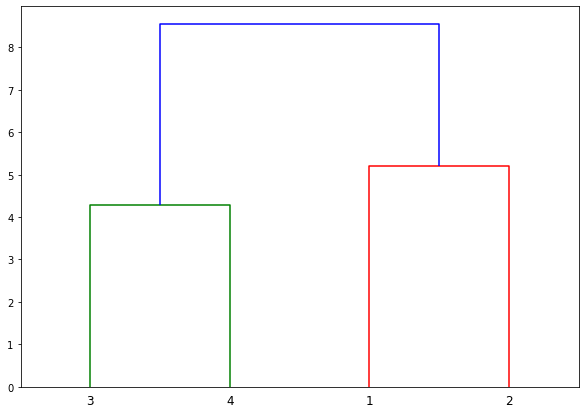

In [ ]:

X = npBV

cluster = AgglomerativeClustering(n_clusters=2, affinity='l1', linkage='average')
cluster.fit_predict(X)
print(cluster.labels_)


linked = linkage(X, 'average')

labelList = range(0, 5)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='ascending',
            show_leaf_counts=True)
plt.show()

[0 0 1 1]


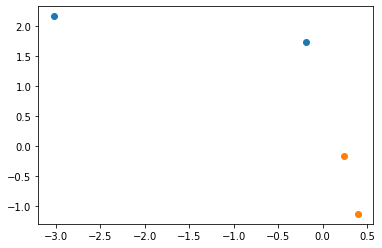

In [ ]:
8
model = AffinityPropagation(damping=0.6)
X = npBV
model.fit(X)

yhat = model.predict(X)
print(yhat)

clusters = unique(yhat)

for cluster in clusters:
	row_ix = where(yhat == cluster)
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

[1 1 0 0]


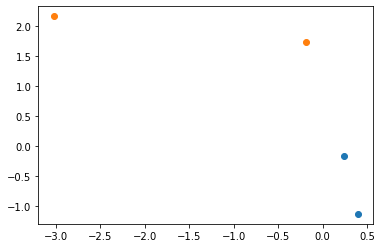

In [ ]:

X = npBV

model = KMeans(n_clusters=2)
model.fit(X)

yhat = model.predict(X)
print(yhat)
clusters = unique(yhat)
for cluster in clusters:
	row_ix = where(yhat == cluster)
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
pyplot.show()